<a href="https://colab.research.google.com/github/brunamycaela/Desafios-Plataforma-Dio/blob/main/Masterclass_Visualiza%C3%A7%C3%A3o_Dados_Especial_Eleicoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **1 Turno das Eleições 2020**



In [55]:
# Bibliotecas para modelagem de dados
import pandas as pd
import numpy as np

# Libs gráficas
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Configurações no pandas , para limitar o numero de linha e colunas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configurações no matplot
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('ggplot')

# **Importação dos Dados**

In [56]:
# Lendo os dados e colocando na nossa variavel 
Base_Dados = pd.read_csv('clean_data.csv')

# Dimensão, verifica numero de linhas e colunas
Base_Dados.shape

(518675, 29)

In [57]:
# Verificar nossos dados
Base_Dados.head()

,Unnamed: 0,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP


In [58]:
# Verificando as informações do DataFrame
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518675 entries, 0 to 518674
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  518675 non-null  int64  
 1   uf                          518675 non-null  object 
 2   type_id                     518675 non-null  int64  
 3   codigo_tse                  518675 non-null  int64  
 4   nome_municipio              518675 non-null  object 
 5   capital                     518675 non-null  int64  
 6   codigo_ibge                 518675 non-null  int64  
 7   job_count                   518675 non-null  int64  
 8   elector_count               518675 non-null  object 
 9   elector_presence            518675 non-null  int64  
 10  absentees                   518675 non-null  int64  
 11  nominal_votes               518675 non-null  int64  
 12  blank_votes                 518675 non-null  int64  
 13  total_null_vot

In [59]:
# Verificando se a campos nulos
Base_Dados.isnull().sum()

Unnamed: 0                        0
uf                                0
type_id                           0
codigo_tse                        0
nome_municipio                    0
capital                           0
codigo_ibge                       0
job_count                         0
elector_count                     0
elector_presence                  0
absentees                         0
nominal_votes                     0
blank_votes                       0
total_null_votes                  0
null_votes                        0
technical_null_votes              0
valid_votes                       0
nulled_votes                      0
judically_nulled_votes            0
vote_count                        0
candidate_number                  0
candidate_name                    3
candidate_coligation              0
candidate_vice_name               0
candidate_vote_destination        0
candidate_vote_count              0
legend_votes                  18640
job                         

In [60]:
# Campos unicos
Base_Dados.nunique()

Unnamed: 0                    518675
uf                                26
type_id                            2
codigo_tse                      5568
nome_municipio                  5294
capital                            2
codigo_ibge                     5568
job_count                         33
elector_count                      2
elector_presence                4864
absentees                       3562
nominal_votes                   8361
blank_votes                     1784
total_null_votes                2194
null_votes                      2177
technical_null_votes             236
valid_votes                     8402
nulled_votes                      10
judically_nulled_votes          1046
vote_count                      4864
candidate_number               20334
candidate_name                394364
candidate_coligation            7941
candidate_vice_name            16997
candidate_vote_destination         4
candidate_vote_count            8730
legend_votes                    1736
j

In [61]:
# retirar coluna ou deletar coluna
Base_Dados.drop(columns='Unnamed: 0', inplace=True)

In [62]:
# Verificar se foi excluida 
Base_Dados.head(5)

,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP


# **Analise Macros**

## **Prefeitos eleitos no pais**

In [63]:
# Verificar campos unicos para realizar o filtros
Base_Dados['job'].unique(),

(array(['prefeito', 'vereador'], dtype=object),)

In [64]:
# Verificar campos unicos para realizar o filtros
Base_Dados['elector_count'].unique()

array(['n', 's'], dtype=object)

In [65]:
# Filtrando o prefeito da coluna job
Query_Prefeitos = Base_Dados[
    (Base_Dados['job'] == 'prefeito') &
    (Base_Dados['elector_count'] == 's')
]

# Dimensão linhas e colunas
Query_Prefeitos.shape

(5519, 28)

In [66]:
# Analise
Analise_01 = Query_Prefeitos.groupby(by=['main_party']).agg(
    Quantidade = ('candidate_vote_count', 'count')
)

# Visualizar o dataframe de filtro que fizemos agrupados
Analise_01.head()

,Quantidade
main_party,
AVANTE,82
CIDADANIA,141
DC,1
DEM,467
MDB,787


In [67]:
# Quantidade Prefeitos Eleitos 
Qtd_Prefeitos_Eleitos = Analise_01['Quantidade'].sum()

# visualizar 
Qtd_Prefeitos_Eleitos

5519

In [68]:
# transformando em porcentagem %
Analise_01['%'] = Analise_01['Quantidade'] / Qtd_Prefeitos_Eleitos * 100
Analise_01['%'] = round( Analise_01['%'], 2)

# Ordenar
Analise_01.sort_values('Quantidade', inplace=True, ascending=False)

# verificar
Analise_01.head(5)

,Quantidade,%
main_party,,
MDB,787,14.26
PP,687,12.45
PSD,660,11.96
PSDB,526,9.53
DEM,467,8.46


In [69]:
# Paleta de cores
sns.color_palette('magma', len(Analise_01))

[(0.013708, 0.011771, 0.068667),
 (0.04383, 0.03383, 0.141886),
 (0.078815, 0.054184, 0.211667),
 (0.123833, 0.067295, 0.295879),
 (0.171713, 0.067305, 0.370771),
 (0.232077, 0.059889, 0.437695),
 (0.284951, 0.063168, 0.472451),
 (0.341482, 0.080564, 0.492631),
 (0.390384, 0.100379, 0.501864),
 (0.445163, 0.122724, 0.506901),
 (0.494258, 0.141462, 0.507988),
 (0.550287, 0.161158, 0.505719),
 (0.600868, 0.177743, 0.500394),
 (0.658483, 0.196027, 0.490253),
 (0.716387, 0.214982, 0.47529),
 (0.767398, 0.233705, 0.457755),
 (0.822926, 0.259016, 0.433573),
 (0.868793, 0.287728, 0.409303),
 (0.913354, 0.330052, 0.382563),
 (0.944006, 0.377643, 0.365136),
 (0.967671, 0.439703, 0.35981),
 (0.981, 0.498428, 0.369734),
 (0.990138, 0.565296, 0.395122),
 (0.994738, 0.62435, 0.427397),
 (0.997077, 0.690088, 0.471811),
 (0.997228, 0.747981, 0.516859),
 (0.99568, 0.812706, 0.572645),
 (0.99317, 0.870024, 0.626189),
 (0.989815, 0.934329, 0.690198)]

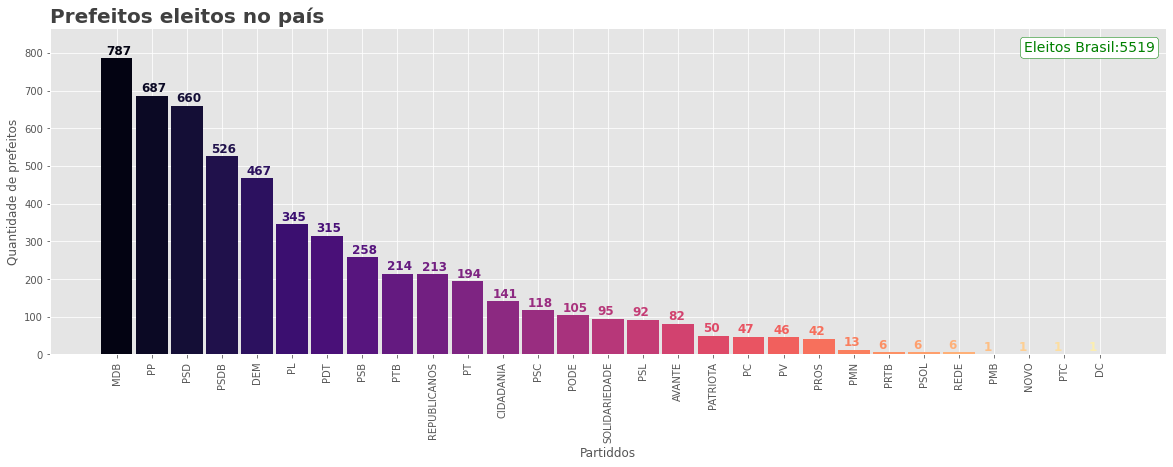

In [70]:
# Tamanho
plt.figure( figsize=(20,6))

# Paleta de cores
Paleta_Cores = sns.color_palette('magma', len(Analise_01))
# Plot
plt.bar( Analise_01.index,
        Analise_01['Quantidade'],
        width= 0.9,
        color= Paleta_Cores
        )

# Titulo do grafico
plt.title('Prefeitos eleitos no país', loc='left', fontsize=20,
          color='#404040',
          fontweight=600
          )

# Labels, no caso x e y 
plt.ylabel('Quantidade de prefeitos')
plt.xlabel('Partiddos')
plt.xticks(rotation=90);

plt.ylim(0,
         Analise_01['Quantidade'].max() + 
         (Analise_01['Quantidade'].max() * 0.1)
         )
# Colocar as informaçoes em cima de cada barra
for Posicao, Valor in enumerate(Analise_01['Quantidade'] ):
  plt.text(
      #Posição do grafico(x , y)
      Posicao - 0.3, Valor + 10,

      # Valor do grafico
      Valor,

      # Paleta
      color= Paleta_Cores[Posicao],

      # Tamanho
      size=12,

      # Espessura ddda fonte
      fontweight=700
  )
# Total eleitos
Total_Eleitos = Analise_01['Quantidade'].sum()

 # Infor Complementar
plt.annotate(
      f'Eleitos Brasil:{Total_Eleitos}',
      xy=(0.99, 0.94),
      xycoords= 'axes fraction',
      ha= 'right',
      va= 'center',
      color='green',
      fontsize= 14,
      fontweight=500,
      bbox= dict(facecolor='#ffffff', edgecolor='green', boxstyle='round',
                 pad=0.25)
  );

## **Vereadores eleitos no país**

In [71]:
# Filtro dos vereadores 
Query_Vereadores = Base_Dados[
    (Base_Dados['job'] == 'vereador') &
    (Base_Dados['elector_count'] == 's')
]

# Dimensão
Query_Vereadores.shape

(57866, 28)

In [72]:
# Analise
Analise_02 = Query_Vereadores.groupby(by=['main_party']).agg(
    Quantidade = ('candidate_vote_count', 'count')
)

# Visualizar o dataframe de filtro que fizemos agrupados
Analise_02.head()

,Quantidade
main_party,
AVANTE,1046
CIDADANIA,1583
DC,121
DEM,4335
MDB,7311


In [73]:
# Quantidade Prefeitos Eleitos 
Qtd_Vereadores_Eleitos = Analise_02['Quantidade'].sum()

# visualizar 
Qtd_Vereadores_Eleitos

57866

In [74]:
# transformando em porcentagem %
Analise_02['%'] = Analise_02['Quantidade'] / Qtd_Vereadores_Eleitos * 100
Analise_02['%'] = round( Analise_02['%'], 2)

# Ordenar
Analise_02.sort_values('Quantidade', inplace=True, ascending=False)

# verificar
Analise_02.head(5)

,Quantidade,%
main_party,,
MDB,7311,12.63
PP,6331,10.94
PSD,5676,9.81
PSDB,4368,7.55
DEM,4335,7.49


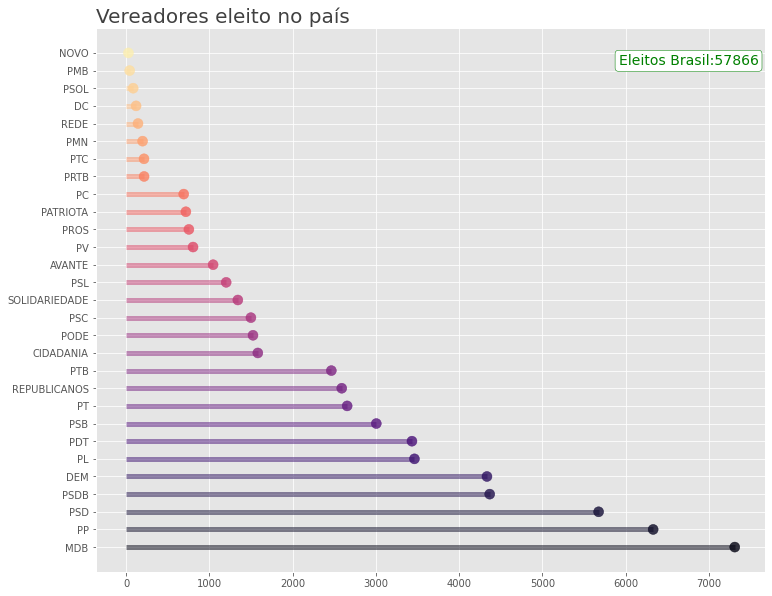

In [75]:
plt.figure( figsize=(12, 10))

# Plot
plt.hlines(
    y=Analise_02.index,
    xmin=0,
    xmax=Analise_02['Quantidade'],
    # Espresura da linha
    lw=5,
    # Paleta de cores
    color=Paleta_Cores,
    # Transparencia
    alpha=0.5
)

# Plot dos pontos
plt.scatter(
    # Dados
    Analise_02['Quantidade'],
    Analise_02.index,
    # Tamanho do ponto
    s=100,
    # Cor
    color=Paleta_Cores,
    # Transparencia
    alpha= 0.8

)

# Titulos
plt.title('Vereadores eleito no país', loc='left', fontsize=20, 
          color='#404040', fontweight=500);


# Total eleitos
Total_Eleitos = Analise_02['Quantidade'].sum()

 # Infor Complementar
plt.annotate(
      f'Eleitos Brasil:{Total_Eleitos}',
      xy=(0.99, 0.94),
      xycoords= 'axes fraction',
      ha= 'right',
      va= 'center',
      color='green',
      fontsize= 14,
      fontweight=500,
      bbox= dict(facecolor='#ffffff', edgecolor='green', boxstyle='round',
                 pad=0.25)
  );

## **Analise de Correlação**

In [76]:
len(Analise_01), len(Analise_02)

(29, 29)

In [77]:
# Tab
Tab_Correlacao = Analise_01['Quantidade'].reset_index()

# Cruzamento
Tab_Correlacao = pd.merge(Tab_Correlacao, Analise_02.reset_index(),
                          on=['main_party'], how='inner')

# Ajustar
Tab_Correlacao.columns = ['Partido', 'Prefeitos', 'Vereadores', '%']

# Drop
Tab_Correlacao.drop( columns=['%'], inplace=True)

# Verificar
Tab_Correlacao.head(5)

,Partido,Prefeitos,Vereadores
0,MDB,787,7311
1,PP,687,6331
2,PSD,660,5676
3,PSDB,526,4368
4,DEM,467,4335


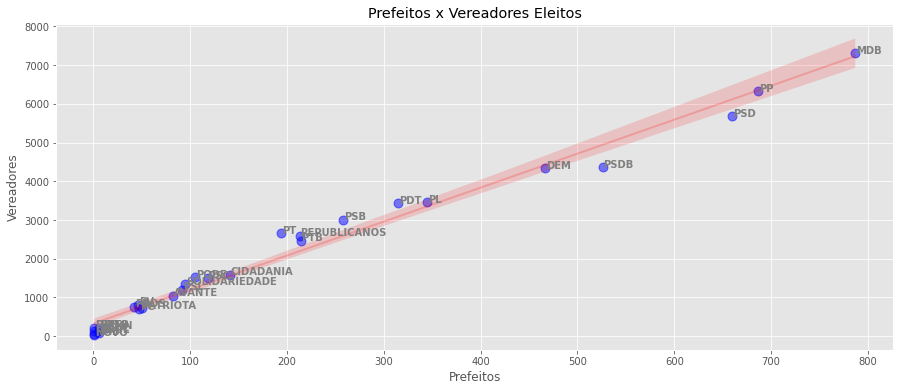

In [78]:
# Plot de regressão
sns.regplot(
    # Dados
    x=Tab_Correlacao['Prefeitos'],
    y=Tab_Correlacao['Vereadores'],

    # Intervalo de Confiança para estimar a regrassão
    ci=95,

    # Cor dos pontos
    scatter_kws={
        'color' : 'blue',
        's' : 80,
        'alpha' : 0.5
    },

    # cor da linha
    line_kws={
        'color' : 'red',
        'alpha' : 0.2,
        'lw' : 2
    }
)

# Titulo do grafico
plt.title('Prefeitos x Vereadores Eleitos');

# Loop para iniciar os textos
for linha in range(0, Tab_Correlacao.shape[0]):
  plt.text(
      Tab_Correlacao['Prefeitos'][linha] + 0.8,
      Tab_Correlacao['Vereadores'][linha],
      Tab_Correlacao['Partido'][linha],
      size='medium',
      color='gray',
      weight='semibold'
  );

## **Plot Tridimensional**

In [79]:
# Sumarizando quantidade de candidatos
Quantidade_Candidatos = Base_Dados.groupby(by=['main_party']).count().iloc[:,0:1].reset_index()

# Renomear colunas
Quantidade_Candidatos.columns = ['Partido', 'Candidatos']

# Verificando 
Quantidade_Candidatos.head()

,Partido,Candidatos
0,AVANTE,14228
1,CIDADANIA,16390
2,DC,4385
3,DEM,31212
4,MDB,42169


In [80]:
# Cruzar
Tab_Correlacao = pd.merge(
    Tab_Correlacao,
    Quantidade_Candidatos,
    on=['Partido'],
    how='inner'
)

# Verificando
Tab_Correlacao.head()

,Partido,Prefeitos,Vereadores,Candidatos
0,MDB,787,7311,42169
1,PP,687,6331,36158
2,PSD,660,5676,37271
3,PSDB,526,4368,31011
4,DEM,467,4335,31212


In [81]:
# Correlação
Tab_Correlacao.corr()

# 1 a -1
# proximo 1 - positiva ( Ambos crescem )
# proxima -1 - negativa ( um cresce, outro desce)

,Prefeitos,Vereadores,Candidatos
Prefeitos,1.000000,0.990918,0.916985
Vereadores,0.990918,1.000000,0.952979
Candidatos,0.916985,0.952979,1.000000


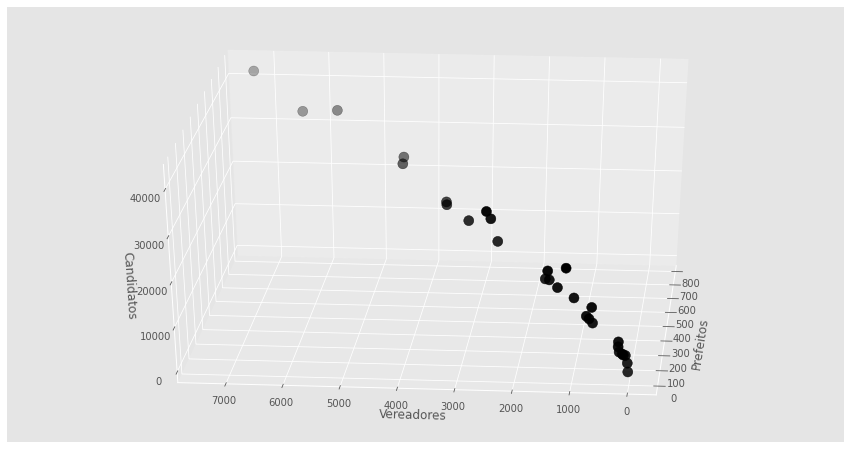

In [82]:
from matplotlib.figure import projections
# Plot Tridimencional

# Tamanho
Figura = plt.figure( figsize=(15, 8))

# Instanciar
Eixo = Figura.add_subplot(111, projection='3d')

# Plot
Eixo.scatter(
    Tab_Correlacao['Prefeitos'],
    Tab_Correlacao['Vereadores'],
    Tab_Correlacao['Candidatos'],
    c='black',
    s=100
)

# Rotação
Eixo.view_init(30, 185)

# Labels
Eixo.set_xlabel('Prefeitos')
Eixo.set_ylabel('Vereadores')
Eixo.set_zlabel('Candidatos');

In [85]:
Figura = px.scatter_3d(
    Tab_Correlacao,
    x='Prefeitos',
    y='Vereadores',
    z='Candidatos',
    color='Partido',
    opacity=0.7,
    symbol='Partido'

)

Figura.show()